In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets


#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#Reading data from the csv
df =  pd.read_csv('data_moods.csv')
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [3]:
df2 = df[['danceability' , 'acousticness', 'energy', 'instrumentalness', 'valence','liveness', 'loudness','speechiness', 'tempo'] ]
df3 = df[['mood']]

X = df2.to_numpy()
Y =  df3.to_numpy()

In [4]:
#Applying standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2)
scaled_features = scaler.transform(df2)
df_feat = pd.DataFrame(scaled_features,columns=df2.columns[:])
df_feat.head()

,danceability,acousticness,energy,instrumentalness,valence,liveness,loudness,speechiness,tempo
0,2.300744,-0.762003,0.681395,-0.852255,1.120746,-0.581363,0.446193,0.550357,-0.021123
1,-0.752668,-1.049750,0.994037,-0.374460,-0.699816,-0.097642,0.865853,-0.114799,0.038688
2,-0.973017,1.128697,-1.130088,-0.852066,-0.898135,-0.517290,-0.508493,-0.528405,0.588217
3,-0.217534,-0.878954,-0.213619,-0.852241,0.970024,-0.379285,-0.177803,0.165776,2.554267
4,-0.513431,-1.091633,1.300548,-0.852255,0.406800,-0.210299,1.062150,1.259051,1.752438


In [5]:
#Label encoder for classification of songs
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

C:\Users\Neha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [6]:
#split dataset into train and test data
X_feat = df_feat.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_feat, encoded_y, test_size=0.2, random_state=1)

# SVM

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000] }
  
grid_linear = GridSearchCV(SVC(kernel = 'linear'), param_grid, refit = True, verbose = 3,cv=10)
  
# fitting the model for grid search
grid_linear.fit(X_train, y_train)

# print best parameter after tuning
print(grid_linear.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_linear.best_estimator_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.836, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.873, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.800, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.782, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.818, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.764, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.778, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.852, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.764, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.855, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.727, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.745, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.764, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   11.1s finished


Text(0, 0.5, 'Mean Test Score of training data')

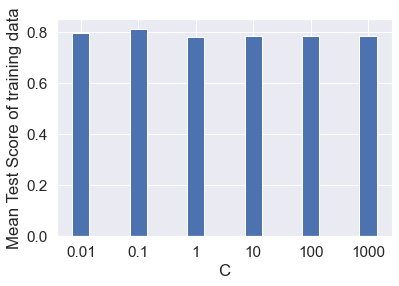

In [30]:
#bar plot for linear svm 
d1=[0.01,0.1, 1, 10, 100, 1000]
scores_linear =  grid_linear.cv_results_['mean_test_score']
x=[]
for i in range(len(d1)):
    x.append(str(d1[i]))
scores = list(scores_linear)
plt.bar(x, scores, width = 0.3)
plt.xlabel('C')
plt.ylabel('Mean Test Score of training data')

In [31]:
#Finding the rbf model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
  
grid_rbf = GridSearchCV(SVC(kernel = 'rbf'), param_grid, refit = True, verbose = 3,cv=10)
  
# fitting the model for grid search
grid_rbf.fit(X_train, y_train)
# print best parameter after tuning
print(grid_rbf.best_params_)
  # print how our model looks after hyper-parameter tuning
print(grid_rbf.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.291, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.291, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.291, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.291, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.291, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.291, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.01, gamma=0.1, score=0.364, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.333, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.296, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.291, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.291, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.291, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.291, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.6s finished


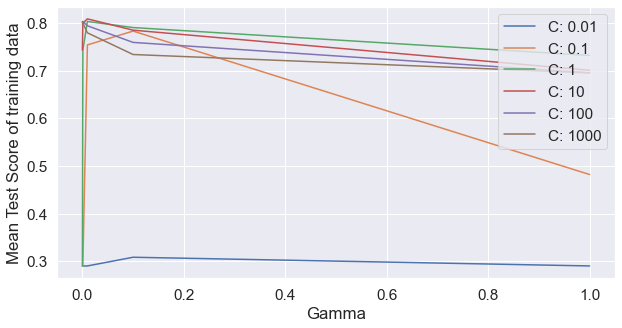

In [32]:
#Graph for the best rbf svm
scores_rbf =  grid_rbf.cv_results_['mean_test_score']
scores = np.array(scores_rbf).reshape(len(param_grid['C']), len(param_grid['gamma']))
plt.figure(figsize=(10,5))
for ind, i in enumerate(param_grid['C']):
    plt.plot(param_grid['gamma'], scores[ind], label='C: ' + str(i))
plt.legend()

plt.xlabel('Gamma')
plt.legend(loc= 'upper right')
plt.ylabel('Mean Test Score of training data')

plt.show()

In [33]:
#Finding the best poly kernel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000], 
              'degree': [3, 4, 5, 6,7]}
  
grid_poly = GridSearchCV(SVC(kernel = 'poly'), param_grid, refit = True, verbose = 3,cv=10)
# fitting the model for grid search
grid_poly.fit(X_train, y_train)
# print best parameter after tuning
print(grid_poly.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid_poly.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] C=0.01, degree=3 ................................................
[CV] .................... C=0.01, degree=3, score=0.473, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] .................... C=0.01, degree=3, score=0.473, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] .................... C=0.01, degree=3, score=0.400, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] .................... C=0.01, degree=3, score=0.400, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] .................... C=0.01, degree=3, score=0.418, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] .................... C=0.01, degree=3, score=0.400, total=   0.0s
[CV] C=0.01, degree=3 ................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.01, degree=5, score=0.400, total=   0.0s
[CV] C=0.01, degree=5 ................................................
[CV] .................... C=0.01, degree=5, score=0.364, total=   0.0s
[CV] C=0.01, degree=5 ................................................
[CV] .................... C=0.01, degree=5, score=0.455, total=   0.0s
[CV] C=0.01, degree=5 ................................................
[CV] .................... C=0.01, degree=5, score=0.382, total=   0.0s
[CV] C=0.01, degree=5 ................................................
[CV] .................... C=0.01, degree=5, score=0.407, total=   0.0s
[CV] C=0.01, degree=5 ................................................
[CV] .................... C=0.01, degree=5, score=0.426, total=   0.0s
[CV] C=0.01, degree=6 ................................................
[CV] .................... C=0.01, degree=6, score=0.491, total=   0.0s
[CV] C=0.01, degree=6 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished


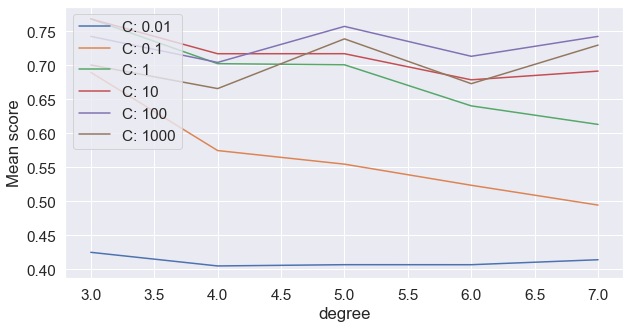

In [34]:
#Plotting graph for the best poly kernel svm
scores_poly =  grid_poly.cv_results_['mean_test_score']
scores = np.array(scores_poly).reshape(len(param_grid['C']), len(param_grid['degree']))
plt.figure(figsize=(10,5))
for ind, i in enumerate(param_grid['C']):
    plt.plot(param_grid['degree'], scores[ind], label='C: ' + str(i))
plt.legend(loc= 'upper left')
plt.xlabel('degree')
plt.ylabel('Mean score')
plt.show()

The Best fit estimators for the three kernels are as follows: 


Linear Kernel SVC(C=0.1, kernel='linear')
rbf Kernel SVC(C=10, gamma=0.01)
poly Kernel SVC(C=1, kernel='poly')
Max Score  with Linear Kernel :  0.8103367003367004
Max Score with rbf Kernel :  0.8084511784511784
Max Score with poly Kernel :  0.7684175084175084
Accuracy of the Validation set with Linear Kernel :  0.8188405797101449
Accuracy of the Validation set with rbf Kernel :  0.8043478260869565
Accuracy of the Validation set with poly Kernel :  0.7971014492753623


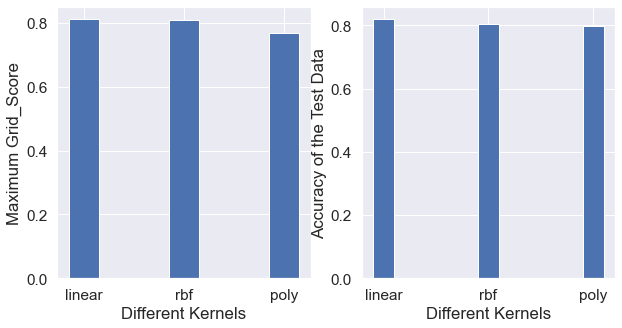

In [35]:
#Predicting the accuracy for svm and choosing the best kernel
linear_max_training_accuracy = max(scores_linear)
rbf_max_training_accuracy = max(scores_rbf)
poly_max_training_accuracy  = max(scores_poly)
print("The Best fit estimators for the three kernels are as follows: ")
print("\n")
print("Linear Kernel" ,grid_linear.best_estimator_ )
print("rbf Kernel" ,grid_rbf.best_estimator_ )
print("poly Kernel" ,grid_poly.best_estimator_ )
print("===================================================================")
print("Max Score  with Linear Kernel : ",linear_max_training_accuracy)
print("Max Score with rbf Kernel : ",rbf_max_training_accuracy)
print("Max Score with poly Kernel : ",poly_max_training_accuracy)
print("====================================================================")
x = ['linear','rbf' ,'poly']
y = [linear_max_training_accuracy,rbf_max_training_accuracy,poly_max_training_accuracy]
linear_max_test_accuracy = grid_linear.score(X_test, y_test)
rbf_max_test_accuracy = grid_rbf.score(X_test, y_test)
poly_max_test_accuracy = grid_poly.score(X_test, y_test)
print("Accuracy of the Validation set with Linear Kernel : ",linear_max_test_accuracy)
print("Accuracy of the Validation set with rbf Kernel : ",rbf_max_test_accuracy)
print("Accuracy of the Validation set with poly Kernel : ",poly_max_test_accuracy)

x_test_acc = [linear_max_test_accuracy,rbf_max_test_accuracy,poly_max_test_accuracy]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(x, y, width = 0.3)
plt.xlabel('Different Kernels')
plt.ylabel('Maximum Grid_Score')


plt.subplot(122)
plt.bar(x, x_test_acc, width = 0.2)
plt.xlabel('Different Kernels')
plt.ylabel('Accuracy of the Test Data')
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.81      0.78      0.79        37
           2       0.50      0.57      0.53        23
           3       0.87      0.81      0.84        42

    accuracy                           0.80       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.81      0.80      0.81       138



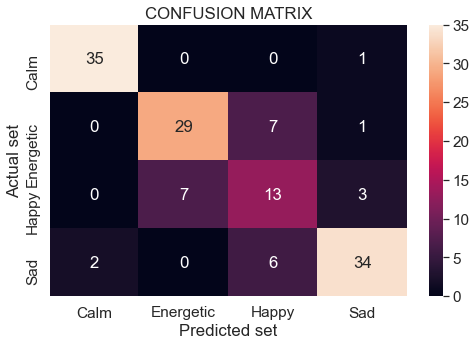

In [36]:
#Confusion matrix and classification report of svm
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
prediction = grid_rbf.predict(X_test)
print(classification_report(y_test,prediction))
cf_matrix = confusion_matrix(y_test, prediction)
labels = ['Calm','Energetic','Happy','Sad']
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cf_matrix, annot=True ,xticklabels=labels, yticklabels=labels)
plt.title('CONFUSION MATRIX')
plt.ylabel('Actual set')
plt.xlabel('Predicted set')
plt.show()

# KNN

{'n_neighbors': 23}
0.7863973063973064
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        36
           1       0.82      0.86      0.84        37
           2       0.58      0.65      0.61        23
           3       0.94      0.69      0.79        42

    accuracy                           0.81       138
   macro avg       0.80      0.80      0.79       138
weighted avg       0.82      0.81      0.81       138



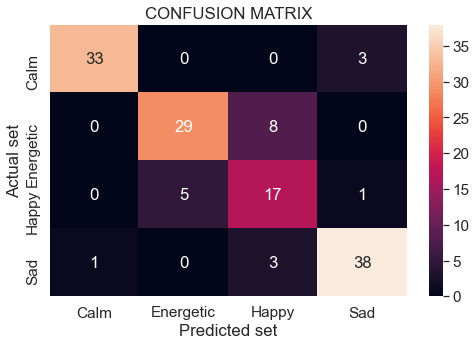

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X_train, y_train)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)
predict_knn=knn_gscv.predict(X_test)
cf_matrix_knn = confusion_matrix(y_test,predict)
print(classification_report(y_test,predict_knn))
labels = ['Calm','Energetic','Happy','Sad']
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cf_matrix_knn, annot=True ,xticklabels=labels, yticklabels=labels)
plt.title('CONFUSION MATRIX')
plt.ylabel('Actual set')
plt.xlabel('Predicted set')
plt.show()

[0.7134680134680135, 0.7207407407407408, 0.7500673400673401, 0.7537037037037037, 0.7664646464646465, 0.7590909090909091, 0.7555218855218854, 0.7645454545454545, 0.760942760942761, 0.7827946127946128, 0.7773063973063974, 0.7736026936026936, 0.7626599326599327, 0.7608754208754209, 0.7755218855218856, 0.7645117845117846, 0.7717845117845118, 0.7663299663299664, 0.7645117845117846, 0.7699663299663301, 0.7772727272727273, 0.7718181818181818, 0.7863973063973064, 0.7863636363636364, 0.7809427609427609, 0.780976430976431, 0.779158249158249, 0.7755218855218855, 0.7810101010101012, 0.7718518518518518]


Text(0, 0.5, 'Cross-validated accuracy')

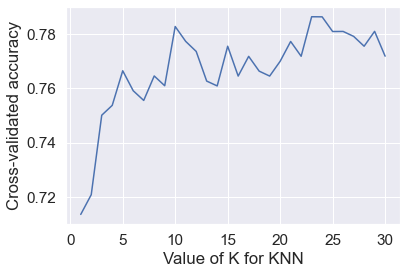

In [39]:
import matplotlib.pyplot as plt

# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)
# plot how accuracy changes as we vary k


# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [1,5,10,15, 20,25, 30,35, 40,45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 300,400, 500,600,700, 800,900, 1000]}

{'bootstrap': [True, False],
 'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 177, 255, 333, 411, 488, 566, 644, 722, 800]}


{'bootstrap': [True, False],
 'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [42]:
#Finding best hyperparameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators = [100, 300, 500, 800, 700]
max_depth = [2,3,4,5,6,7,8,9,10,12,11,13,14,15]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
forest = RandomForestClassifier(random_state = 1)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 10 folds for each of 1400 candidates, totalling 14000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 4988 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 6038 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 7188 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 8438 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 9788 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 11238 tasks      |

In [43]:
#Best Parameter
best_parameters = gridF.best_params_
print(best_parameters)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [44]:
#Classification Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predict=gridF.predict(X_test)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[33  0  0  3]
 [ 0 29  8  0]
 [ 0  5 17  1]
 [ 1  0  3 38]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.85      0.78      0.82        37
           2       0.61      0.74      0.67        23
           3       0.90      0.90      0.90        42

    accuracy                           0.85       138
   macro avg       0.83      0.84      0.83       138
weighted avg       0.86      0.85      0.85       138



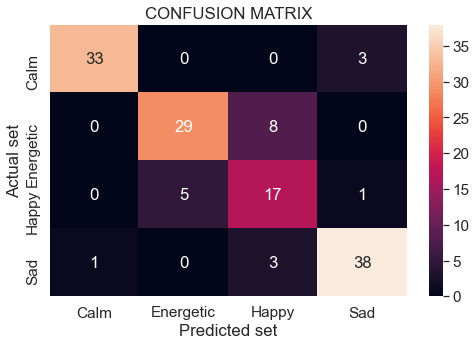

In [45]:
#Confusion Matrix
cf_matrix_random = confusion_matrix(y_test,predict)
labels = ['Calm','Energetic','Happy','Sad']
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cf_matrix_random, annot=True ,xticklabels=labels, yticklabels=labels)
plt.title('CONFUSION MATRIX')
plt.ylabel('Actual set')
plt.xlabel('Predicted set')
plt.show()

In [46]:
#Saving the model
import pickle
pickle.dump(gridF, open('C:\\Users\\Neha\\Desktop\\AIProject\\finalprediction.pickle', 'wb'))